In [188]:
!pip install opencv-python

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import skimage
from scipy.ndimage.filters import median_filter


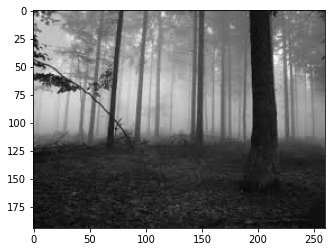

In [190]:
image = cv2.imread('im3.jpg')
plt.imshow(image)

In [191]:
gaussian = cv2.GaussianBlur(image, (0, 0), 1.0)
print(gaussian.shape,image.shape)
unsharp_image = cv2.addWeighted(image, 3, gaussian, -1.0, 0)

(194, 260, 3) (194, 260, 3)


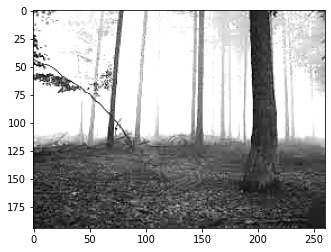

In [192]:
plt.imshow(unsharp_image)

In [193]:
cv2.imwrite("output_img.jpg", unsharp_image)

True

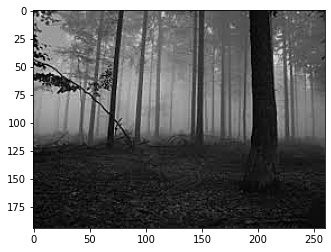

In [194]:
gaussian = cv2.GaussianBlur(image, (0, 0), 1.0)
unsharp_image = cv2.addWeighted(image, 1.8, gaussian, -1.0, 0)
plt.imshow(unsharp_image)

Without Lib

In [195]:
from urllib.parse import parse_qs
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Kernel Shape : {}".format(kernel.shape))  
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
    output = np.zeros(image.shape)
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    if verbose:
        parse_qs
    return output 

In [196]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
 

In [197]:
def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        pass
 
    return kernel_2D
 

In [198]:
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)
 

In [199]:
def stGuss(image):
    blurred = gaussian_blur(image, 5, verbose=True)
    return(blurred)

In [200]:
image = cv2.imread('im3.jpg',2)
gussImg = stGuss(image)

Kernel Shape : (5, 5)


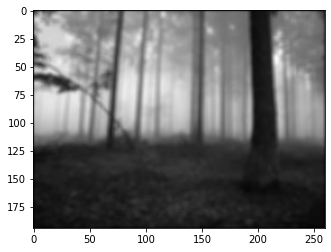

In [201]:
plt.imshow(gussImg, cmap='gray')
plt.show()

In [202]:
print(image.shape,gussImg.shape)


(194, 260) (194, 260)


In [203]:
def unsharp_mask(image,blurred, kernel_size=(5, 5), sigma=2.0, amount=1.5, threshold=0):
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

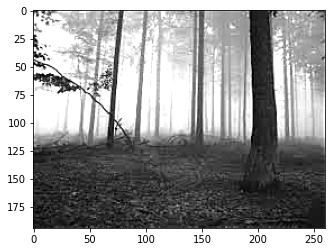

In [204]:
plt.imshow(unsharp_mask(image,gussImg),cmap='gray')